In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

In [2]:
data = np.loadtxt('ex2data1.txt')
data[1:10,:]

array([[30.28671077, 43.89499752,  0.        ],
       [35.84740877, 72.90219803,  0.        ],
       [60.18259939, 86.3085521 ,  1.        ],
       [79.03273605, 75.34437644,  1.        ],
       [45.08327748, 56.31637178,  0.        ],
       [61.10666454, 96.51142588,  1.        ],
       [75.02474557, 46.55401354,  1.        ],
       [76.0987867 , 87.42056972,  1.        ],
       [84.43281996, 43.53339331,  1.        ]])

In [3]:
X = data[:, (0,1)]
y = data[:, 2].reshape(-1, 1)

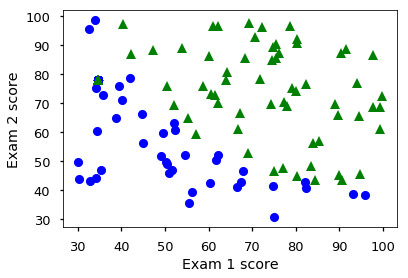

In [4]:
%matplotlib inline
plt.plot(
    X[np.where(y==0),0].T, X[np.where(y==0), 1].T, 'bo');
plt.plot(
    X[np.where(y==1),0].T, X[np.where(y==1), 1].T, 'g^');

plt.xlabel('Exam 1 score');
plt.ylabel('Exam 2 score');
# plt.legend(['Admitted', 'Not admitted']);

In [5]:
m, n = X.shape
XX = np.append(np.ones([m,1]), X, axis=1)
initial_theta = np.zeros([n+1, 1])

In [6]:
def sigmoid(z):
    g = 1.0/(1.0+np.exp(-z))
    return g

def costFunction(theta, X, y):
    m = len(y)
    hx = sigmoid(np.dot(X, theta))
    J1 = -y * np.log(hx)
    J2 = (1.0 - y) * np.log(1.0 - hx)
    J = 1.0 / m * np.sum( J1 - J2 )
    
    grad = 1.0 / m * np.sum( (hx - y) * X , axis = 0)
    grad = grad.reshape(-1, 1)
    
    return J, grad

In [7]:
cost, grad = costFunction( initial_theta, XX, y)
print cost ### 0.693
print grad ### -0.100, -12.0092, -11.2628

0.6931471805599453
[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


In [8]:
test_theta = [[-24], [0.2], [0.2]]
cost, grad = costFunction(test_theta, XX, y)
print cost ### 0.218
print grad ### 0.043, 2.566, 2.647

0.21833019382659785
[[0.04290299]
 [2.56623412]
 [2.64679737]]


In [13]:
def gradientDescent(X, y, theta, alpha, num_iters):
    j_his = np.zeros([num_iters, 1])
    for iter in range(num_iters):
        j_his[iter], grad = costFunction(theta, X, y)
        theta -= alpha * grad
    return theta, j_his

### maybe optimal method
### here

In [77]:
##############################
##
##  Something is wrong!!!
##
##############################
alpha = 0.001
num_iters = 20
m, n = X.shape
# initial_theta = np.zeros([n+1, 1]).reshape(-1,1)  ### fall into local minimum
initial_theta = np.array([-25, 0.3, 0.3]).reshape(-1,1)
theta, j_his = gradientDescent(XX, y, initial_theta, alpha, num_iters)
print j_his[-1] ### 0.203
print theta     ### -25.161, 0.206, 0.201

[0.20352841]
[[-25.00171254]
 [  0.2041154 ]
 [  0.20105619]]


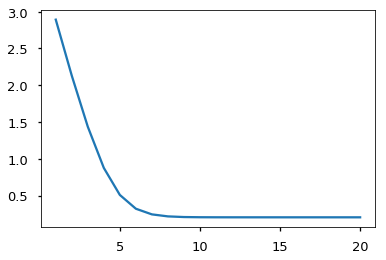

In [78]:
plt.plot(range(1, len(j_his)+1), j_his);

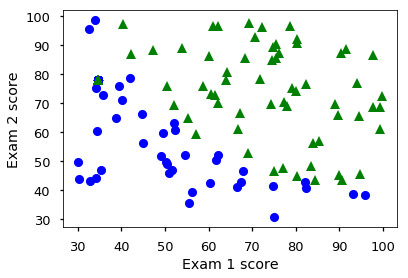

In [79]:
################################################
##
##    plot decision boundary
##
################################################
%matplotlib inline
plt.plot(
    X[np.where(y==0),0].T, X[np.where(y==0), 1].T, 'bo');
plt.plot(
    X[np.where(y==1),0].T, X[np.where(y==1), 1].T, 'g^');

plt.xlabel('Exam 1 score');
plt.ylabel('Exam 2 score');

In [80]:
prob = sigmoid(np.dot([1, 45, 85] , theta))
print prob ### 0.775 +- 0.002

[0.78129971]


In [81]:
def predict(theta, X):
    p = sigmoid(np.dot(X, theta))
    p = (p>=0.5).astype(int)
    return p

p = predict(theta, XX)
correct = (np.abs(p-y)<1e-1).astype(int)
# print np.append(np.append(p, y, axis = 1), correct, axis=1)
print np.mean(correct)*100  ### 89.0 %

90.0
